## Employee Burnout:

World Mental Health Day is celebrated on October 10 each year. The Objective of this day is to raise an awareness about Mental Health Issues around the World and mobilize efforts in support of Mental Health. According to an anonymous survey, About 450 million People live with Mental Disorders that can be one of the primary causes of poor health and disability worldwide.so, The  Task is to understand and observe the Mental Health of all the Employees in the Company. Therefore, It is required to predict the Burn Out Rate of Employees based on the provided Features thus helping the Company to take appropriate measures for Employees.



In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold,KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
Train_Data=pd.read_csv('train.csv')

In [3]:
Train_Data

Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      2008-09-30  Female      Service   
1          fffe3700360033003500      2008-11-30    Male      Service   
2      fffe31003300320037003900      2008-03-10  Female      Product   
3      fffe32003400380032003900      2008-11-03    Male      Service   
4      fffe31003900340031003600      2008-07-24  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No          2.0                  3.0   
1                     Yes          1.0                  2.0   
2                     Yes          2.0                  NaN   
3                     Yes          1.0                  1.0   
4                      No          3.0                  7.0   
...                   ...          ...                  ...   
22745                  No          1.0                  3.0   
22746                 Yes          3.0                  6.0   
22747                 Yes          3.0                  7.0   
22748                  No          2.0                  5.0   
22749                  No          3.0                  6.0   

       Mental Fatigue Score  Burn Rate  
0                       3.8       0.16  
1                       5.0       0.36  
2                       5.8       0.49  
3                       2.6       0.20  
4                       6.9       0.52  
...                     ...        ...  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61  

[22750 rows x 9 columns]

In [4]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [5]:
Train_Data.describe(include='all')

Employee ID Date of Joining  Gender Company Type  \
count                      22750           22750   22750        22750   
unique                     22750             366       2            2   
top     fffe31003500360035003300      2008-01-06  Female      Service   
freq                           1              86   11908        14833   
mean                         NaN             NaN     NaN          NaN   
std                          NaN             NaN     NaN          NaN   
min                          NaN             NaN     NaN          NaN   
25%                          NaN             NaN     NaN          NaN   
50%                          NaN             NaN     NaN          NaN   
75%                          NaN             NaN     NaN          NaN   
max                          NaN             NaN     NaN          NaN   

       WFH Setup Available   Designation  Resource Allocation  \
count                22750  22750.000000         21369.000000   
unique                   2           NaN                  NaN   
top                    Yes           NaN                  NaN   
freq                 12290           NaN                  NaN   
mean                   NaN      2.178725             4.481398   
std                    NaN      1.135145             2.047211   
min                    NaN      0.000000             1.000000   
25%                    NaN      1.000000             3.000000   
50%                    NaN      2.000000             4.000000   
75%                    NaN      3.000000             6.000000   
max                    NaN      5.000000            10.000000   

        Mental Fatigue Score     Burn Rate  
count           20633.000000  21626.000000  
unique                   NaN           NaN  
top                      NaN           NaN  
freq                     NaN           NaN  
mean                5.728188      0.452005  
std                 1.920839      0.198226  
min                 0.000000      0.000000  
25%                 4.600000      0.310000  
50%                 5.900000      0.450000  
75%                 7.100000      0.590000  
max                10.000000      1.000000

In [6]:
# CHECKING NULL VALUES
Train_Data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

### DATA PREPROCESSING

In [7]:
Train_Data['Resource Allocation'].value_counts()

4.0     3893
5.0     3861
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
8.0     1044
9.0      446
10.0     159
Name: Resource Allocation, dtype: int64

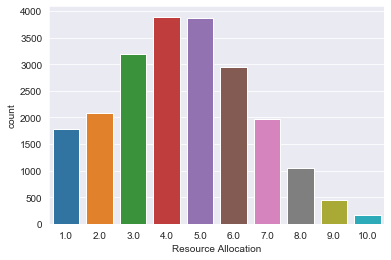

In [8]:
sns.countplot(Train_Data['Resource Allocation'])

In [9]:
Train_Data["Resource Allocation"].mean()

4.481398287238523

In [10]:
# DUE TO NORMAL DISTRIBUTION PREFERED MEAN OVER MEDIAN
Train_Data["Resource Allocation"]=Train_Data["Resource Allocation"].fillna(5)

In [11]:
Train_Data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation        0
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [12]:
Train_Data["Mental Fatigue Score"].value_counts()

6.0    470
5.8    464
5.9    458
6.1    457
6.3    454
      ... 
0.5     24
0.2     23
0.4     19
0.1     17
0.3     13
Name: Mental Fatigue Score, Length: 101, dtype: int64

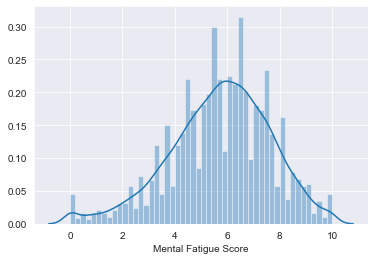

In [13]:
sns.distplot(Train_Data["Mental Fatigue Score"],bins=50)

In [14]:
Train_Data["Mental Fatigue Score"].mean()

5.728187854407972

In [15]:
# DUE TO NORMAL DISTRIBUTION: PREFERED MEAN THAN MEDIAN
Train_Data["Mental Fatigue Score"]=Train_Data["Mental Fatigue Score"].fillna(Train_Data["Mental Fatigue Score"].mean())

In [16]:
Train_Data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation        0
Mental Fatigue Score       0
Burn Rate               1124
dtype: int64

In [17]:
Train_Data["Burn Rate"].value_counts()

0.47    475
0.43    444
0.41    434
0.45    431
0.50    428
       ... 
0.98     18
0.95     17
0.97     17
0.96     13
0.99      8
Name: Burn Rate, Length: 101, dtype: int64

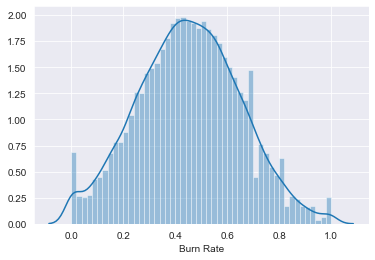

In [18]:
sns.distplot(Train_Data["Burn Rate"],bins=50)

In [19]:
# DUE TO NORMAL DISTRIBUTION: PREFERED MEAN THAN MEDIAN
Train_Data["Burn Rate"]=Train_Data["Burn Rate"].fillna(Train_Data["Burn Rate"].mean())

In [20]:
Train_Data.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [21]:
Train_Data.drop(["Date of Joining"],axis=1,inplace=True)

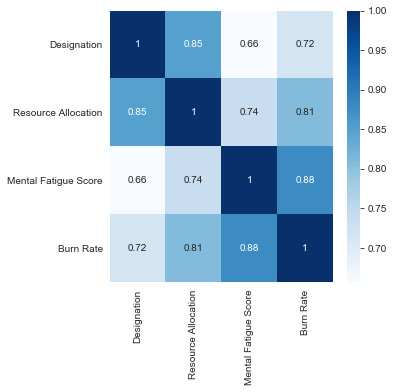

In [22]:
# USING THE HEATMAP TO VISUALIZE CORRELATION
plt.figure(figsize=(5,5))
sns.heatmap(Train_Data.corr(),annot=True,cmap='Blues')

### EDA

#### GENDER:

In [23]:
# ON GENDER:
Train_Data["Gender"].value_counts()

Female    11908
Male      10842
Name: Gender, dtype: int64

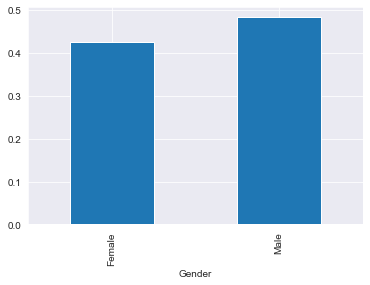

In [24]:
Train_Data.groupby("Gender")["Burn Rate"].mean().plot(kind="bar")

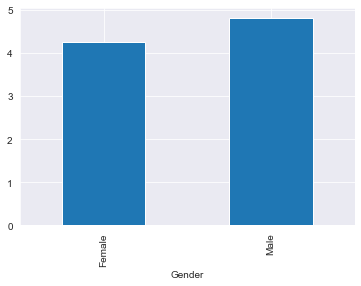

In [25]:
Train_Data.groupby("Gender")["Resource Allocation"].mean().plot(kind ="bar");

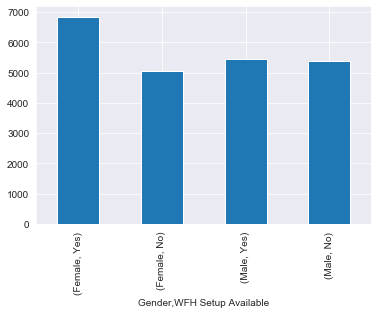

In [26]:
Train_Data.groupby("Gender")["WFH Setup Available"].value_counts().plot(kind ="bar");

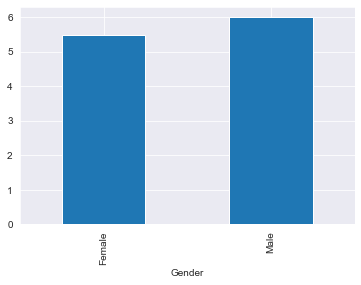

In [27]:
Train_Data.groupby("Gender")["Mental Fatigue Score"].mean().plot(kind="bar")

#### RESOURCE ALLOCATION:

In [28]:
Train_Data["Resource Allocation"].value_counts()

5.0     5242
4.0     3893
3.0     3192
6.0     2943
2.0     2075
7.0     1965
1.0     1791
8.0     1044
9.0      446
10.0     159
Name: Resource Allocation, dtype: int64

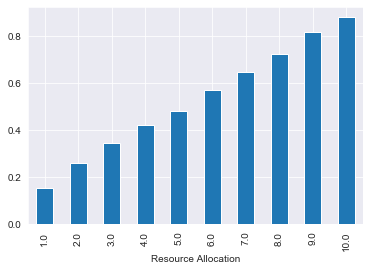

In [29]:
Train_Data.groupby("Resource Allocation")["Burn Rate"].mean().plot(kind="bar");

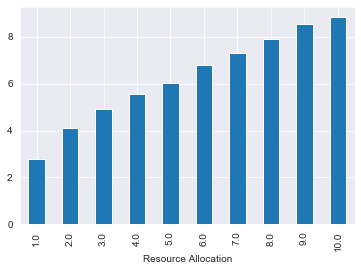

In [30]:
Train_Data.groupby("Resource Allocation")["Mental Fatigue Score"].mean().plot(kind="bar");

#### WFH SETUP AVAILABLE:

In [31]:
Train_Data["WFH Setup Available"].value_counts()

Yes    12290
No     10460
Name: WFH Setup Available, dtype: int64

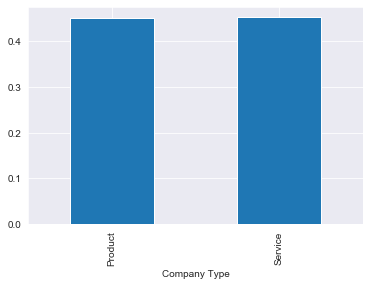

In [32]:
Train_Data.groupby("Company Type")["Burn Rate"].mean().plot(kind = "bar");

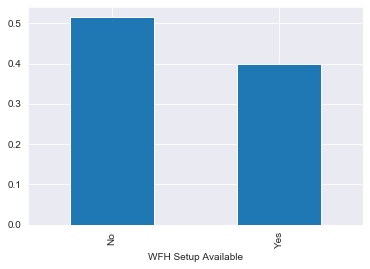

In [33]:
Train_Data.groupby("WFH Setup Available")["Burn Rate"].mean().plot(kind ="bar");

In [34]:
Train_Data.drop(["Employee ID"],inplace=True,axis="columns")

In [35]:
Train=Train_Data.copy()

In [36]:
y=Train_Data.loc[:,"Burn Rate"]
y.shape

(22750,)

In [37]:
Train_Data.drop(["Burn Rate"],inplace=True,axis="columns")
Train_Data

Gender Company Type WFH Setup Available  Designation  \
0      Female      Service                  No          2.0   
1        Male      Service                 Yes          1.0   
2      Female      Product                 Yes          2.0   
3        Male      Service                 Yes          1.0   
4      Female      Service                  No          3.0   
...       ...          ...                 ...          ...   
22745  Female      Service                  No          1.0   
22746  Female      Product                 Yes          3.0   
22747    Male      Service                 Yes          3.0   
22748  Female      Service                  No          2.0   
22749    Male      Product                  No          3.0   

       Resource Allocation  Mental Fatigue Score  
0                      3.0              3.800000  
1                      2.0              5.000000  
2                      5.0              5.800000  
3                      1.0              2.600000  
4                      7.0              6.900000  
...                    ...                   ...  
22745                  3.0              5.728188  
22746                  6.0              6.700000  
22747                  7.0              5.728188  
22748                  5.0              5.900000  
22749                  6.0              7.800000  

[22750 rows x 6 columns]

In [38]:
Train1=Train_Data.copy()

### K-FOLD

In [39]:
Train_Data = pd.get_dummies(Train_Data,columns=["Gender","Company Type","WFH Setup Available"])

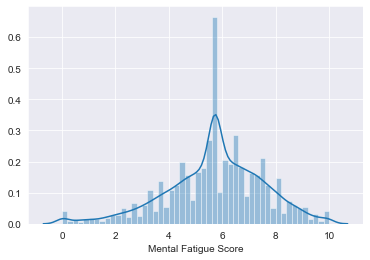

In [40]:
sns.distplot(Train_Data["Mental Fatigue Score"])

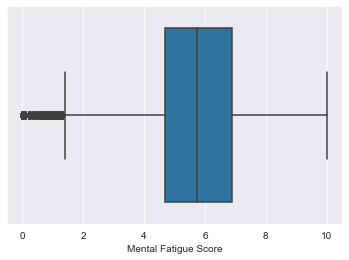

In [41]:
sns.boxplot(Train_Data["Mental Fatigue Score"])

In [42]:
Scaler=StandardScaler()
Train_Mental=Scaler.fit_transform(Train_Data["Mental Fatigue Score"].values.reshape(-1,1))

In [43]:
Train_Data.drop("Mental Fatigue Score",axis=1,inplace=True)

In [44]:
Train_Data["Standard Mental"]=Train_Mental

In [45]:
Train_Data.head()

Designation  Resource Allocation  Gender_Female  Gender_Male  \
0          2.0                  3.0              1            0   
1          1.0                  2.0              0            1   
2          2.0                  5.0              1            0   
3          1.0                  1.0              0            1   
4          3.0                  7.0              1            0   

   Company Type_Product  Company Type_Service  WFH Setup Available_No  \
0                     0                     1                       1   
1                     0                     1                       0   
2                     1                     0                       0   
3                     0                     1                       0   
4                     0                     1                       1   

   WFH Setup Available_Yes  Standard Mental  
0                        0        -1.054092  
1                        1        -0.398082  
2                        1         0.039258  
3                        1        -1.710102  
4                        0         0.640600

#### SUPPORT VECTOR REGRESSION:

In [46]:
Scores = []
SVR = SVR(kernel='rbf')
CV = KFold(n_splits=10, random_state=42, shuffle=False)
for Train_Index,Test_Index in CV.split(Train_Data):
    X_train, X_test = Train_Data.iloc[Train_Index],Train_Data.iloc[Test_Index] 
    y_train, y_test = y[Train_Index], y[Test_Index]
    SVR.fit(X_train, y_train)
    Scores.append(SVR.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [47]:
Scores

[0.8606546935038063,
 0.847586546195066,
 0.8513793307771182,
 0.8410084701916782,
 0.8339518111568915,
 0.8410939881458966,
 0.8459394316157819,
 0.846424740792134,
 0.8525400350330286,
 0.8502203396233252]

In [48]:
from sklearn.model_selection import RandomizedSearchCV
K=3

# PARAMETERS FOR TUNING
Parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.9],'C': [0.1,1, 10, 100,]}]
SVR = RandomizedSearchCV(estimator=SVR,param_distributions=Parameters,cv=K)
SVR.fit(Train_Data,y)

print("Grid Scores:")
Means=SVR.cv_results_['mean_test_score']
Std=SVR.cv_results_['std_test_score']
for Means,Std,Parameters in zip(Means,Std,SVR.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (Means,Std*2,Parameters))

Grid Scores:
0.817 (+/-0.013) for {'kernel': 'rbf', 'gamma': 0.9, 'C': 100}
0.841 (+/-0.008) for {'kernel': 'rbf', 'gamma': 0.5, 'C': 1}
0.833 (+/-0.007) for {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}
0.832 (+/-0.009) for {'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}
0.827 (+/-0.009) for {'kernel': 'rbf', 'gamma': 0.5, 'C': 100}
0.847 (+/-0.007) for {'kernel': 'rbf', 'gamma': 0.2, 'C': 1}
0.846 (+/-0.007) for {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
0.837 (+/-0.010) for {'kernel': 'rbf', 'gamma': 0.5, 'C': 10}
0.844 (+/-0.009) for {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
0.845 (+/-0.006) for {'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}


#### REGRESSION : 

In [49]:
Regression_Scores = []
LR = LinearRegression()
CV = KFold(n_splits=10, random_state=42, shuffle=False)
for Train_Index,Test_Index in CV.split(Train_Data):
    X_train, X_test = Train_Data.iloc[Train_Index],Train_Data.iloc[Test_Index] 
    y_train, y_test = y[Train_Index], y[Test_Index]
    LR.fit(X_train, y_train)
    Regression_Scores.append(LR.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [50]:
Regression_Scores

[0.8426008791958173,
 0.8332680721799167,
 0.8389404817065876,
 0.8228056013147034,
 0.8169065573204103,
 0.8278682209497105,
 0.8278600463799396,
 0.8305833822664004,
 0.8327525806238887,
 0.8323628828249036]

#### LABEL ENCODING

In [51]:
for Train_Index,Test_Index in CV.split(Train1):
    X_train, X_test = Train1.iloc[Train_Index],Train1.iloc[Test_Index] 
    y_train, y_test = y[Train_Index], y[Test_Index]

In [52]:
def Encode(Train,Test):
    LE=LabelEncoder()
    LE.fit(Train)
    Train_Enoded = LE.transform(Train)
    Test_Encoded = LE.transform(Test)
    return Train_Enoded,Test_Encoded,LE

In [53]:
# GENDER
Gender_Train,Gender_Test,GE = Encode(X_train["Gender"],X_test["Gender"])

Gender_Train = Gender_Train.reshape(-1,1)
Gender_Test = Gender_Test.reshape(-1,1)

In [54]:
# COMPANY
Company_Train,Company_Test,CO = Encode(X_train["Company Type"],X_test["Company Type"])

Company_Train = Company_Train.reshape(-1,1)
Company_Test = Company_Test.reshape(-1,1)

In [55]:
# WFH
WFH_Train,WFH_Test,WFH = Encode(X_train["WFH Setup Available"],X_test["WFH Setup Available"])

WFH_Train = WFH_Train.reshape(-1,1)
WFH_Test = WFH_Test.reshape(-1,1)

### FEATURE SCALING

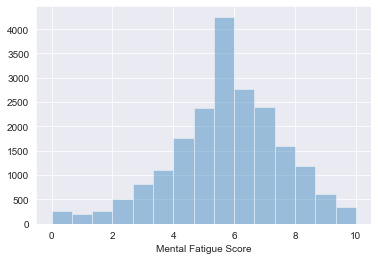

In [56]:
sns.distplot(X_train["Mental Fatigue Score"],kde=False,bins=15)

In [57]:
# AS IT FOLLOWS GAUSSIAN DISTRIBUTION,SO STANDARIZATION IS CARRIED OUT
STD = StandardScaler()
STD.fit(X_train["Mental Fatigue Score"].values.reshape(-1,1))

Mental_Train = STD.transform(X_train["Mental Fatigue Score"].values.reshape(-1,1))
Mental_Test = STD.transform(X_test["Mental Fatigue Score"].values.reshape(-1,1))

In [58]:
print("Shapes:")
print(f"{Gender_Train.shape},{Gender_Test.shape}")
print(f"{Company_Train.shape},{Company_Test.shape}")
print(f"{WFH_Train.shape},{WFH_Test.shape}")
print(f"{Mental_Train.shape},{Mental_Test.shape}")

Shapes:
(20475, 1),(2275, 1)
(20475, 1),(2275, 1)
(20475, 1),(2275, 1)
(20475, 1),(2275, 1)


### FEATURE ENGINEERING

In [59]:
Train.columns

Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
def Encode(Train):
    Vect=CountVectorizer(binary=True)
    Vect.fit(Train)
    Train_Enoded = Vect.transform(Train)
    return Train_Enoded,Vect

In [62]:
Gender_Encode,Gen = Encode(Train["Gender"])
from joblib import dump, load
dump(Gen,'Gender1.joblib')

['Gender1.joblib']

In [63]:
Company_Encode,Comp = Encode(Train["Company Type"])
dump(Comp,'Comp1.joblib')

['Comp1.joblib']

In [64]:
WFH_Encode,WFH = Encode(Train["WFH Setup Available"])
dump(WFH,'WFH1.joblib')

['WFH1.joblib']

In [65]:
Train.head()

Gender Company Type WFH Setup Available  Designation  Resource Allocation  \
0  Female      Service                  No          2.0                  3.0   
1    Male      Service                 Yes          1.0                  2.0   
2  Female      Product                 Yes          2.0                  5.0   
3    Male      Service                 Yes          1.0                  1.0   
4  Female      Service                  No          3.0                  7.0   

   Mental Fatigue Score  Burn Rate  
0                   3.8       0.16  
1                   5.0       0.36  
2                   5.8       0.49  
3                   2.6       0.20  
4                   6.9       0.52

In [66]:
STD = StandardScaler()
Mental_Train = STD.fit_transform(Train["Mental Fatigue Score"].values.reshape(-1,1))
Train["STD_Mental"] = Mental_Train
Train.drop("Mental Fatigue Score",axis="columns",inplace=True)

Train = pd.get_dummies(data = Train,columns = ["Gender","Company Type","WFH Setup Available"])

In [67]:
dump(STD,'Standard.joblib')

['Standard.joblib']

In [68]:
from scipy.sparse import hstack
X_Tr=hstack((Company_Encode,Gender_Encode,WFH_Encode,Mental_Train)).tocsr()

In [69]:
X_Tr

<22750x7 sparse matrix of type '<class 'numpy.float64'>'
	with 91000 stored elements in Compressed Sparse Row format>

In [70]:
y = Train.loc[:,"Burn Rate"]
Train.drop("Burn Rate",axis=1,inplace=True)

In [71]:
Train.head()

Designation  Resource Allocation  STD_Mental  Gender_Female  Gender_Male  \
0          2.0                  3.0   -1.054092              1            0   
1          1.0                  2.0   -0.398082              0            1   
2          2.0                  5.0    0.039258              1            0   
3          1.0                  1.0   -1.710102              0            1   
4          3.0                  7.0    0.640600              1            0   

   Company Type_Product  Company Type_Service  WFH Setup Available_No  \
0                     0                     1                       1   
1                     0                     1                       0   
2                     1                     0                       0   
3                     0                     1                       0   
4                     0                     1                       1   

   WFH Setup Available_Yes  
0                        0  
1                        1  
2                        1  
3                        1  
4                        0

# MODEL

## SVR:

In [72]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold,KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

Scores = []
SVR = SVR(kernel='rbf',C=1,epsilon=0.01,gamma=0.2)
CV = KFold(n_splits=10, random_state=42, shuffle=False)
for Train_Index, Test_Index in CV.split(Train):
    X_Train, X_Test = X_Tr[Train_Index], X_Tr[Test_Index] 
    y_Train, y_Test = y[Train_Index], y[Test_Index]
    SVR.fit(X_Train, y_Train)
    Scores.append(SVR.score(X_Test, y_Test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
Scores

## LINEAR REGRESSION:

In [73]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

Scores=[]
LR = LinearRegression()
CV = KFold(n_splits=10, random_state=42,shuffle=False)
for Train_Index,Test_Index in CV.split(Train):
    X_Train, X_Test = Train.iloc[Train_Index],Train.iloc[Test_Index] 
    y_Train, y_Test = y[Train_Index], y[Test_Index]
    LR.fit(X_Train, y_Train)
    Scores.append(LR.score(X_Test, y_Test))
print(Scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.8426008791958174, 0.8332680721799167, 0.8389404817065876, 0.8228056013147035, 0.8169065573204103, 0.8278682209497105, 0.8278600463799396, 0.8305833822664004, 0.8327525806238887, 0.8323628828249036]


## GRADIENT BOOST REGRESSOR:

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold,KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

Scores = []
GBDT = GradientBoostingRegressor(n_estimators =100, max_depth = 4, learning_rate= 0.1 , random_state=0)
CV = KFold(n_splits=10, random_state=42, shuffle=False)
for Train_Index, Test_Index in CV.split(Train):
    X_Train, X_Test = Train.iloc[Train_Index],Train.iloc[Test_Index] 
    y_Train, y_Test = y[Train_Index], y[Test_Index]
    GBDT.fit(X_Train, y_Train)
    Scores.append(GBDT.score(X_Test, y_Test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [75]:
Scores

[0.8757910876936251,
 0.8647241881169154,
 0.8644109013846651,
 0.8586979719080373,
 0.8491123819963164,
 0.8586034265164927,
 0.8579635544150586,
 0.8630544453034691,
 0.8693074515168115,
 0.8709965040205462]

In [76]:
dump(GBDT,'GBDT.joblib') 

['GBDT.joblib']

## K NEIGHBORS REGRESSOR:

>mean 0.847 (0.008)
>median 0.847 (0.008)
>most_frequent 0.848 (0.006)
>constant 0.847 (0.010)


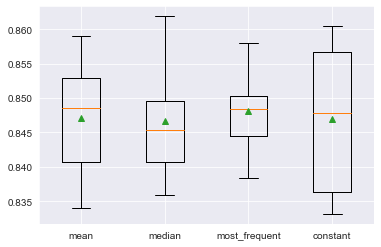

>mean 0.848 (0.007)
>median 0.848 (0.006)
>most_frequent 0.848 (0.007)
>constant 0.848 (0.004)


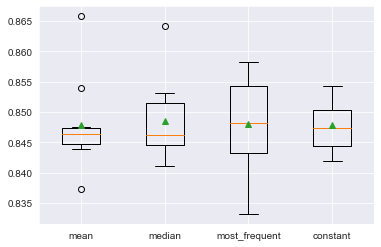

>mean 0.848 (0.008)
>median 0.848 (0.006)
>most_frequent 0.848 (0.006)
>constant 0.848 (0.008)


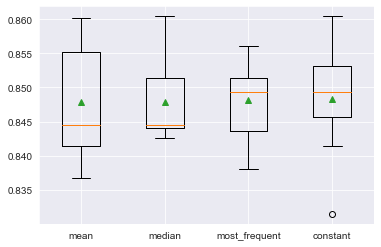

>mean 0.848 (0.007)
>median 0.847 (0.008)
>most_frequent 0.847 (0.012)
>constant 0.848 (0.009)


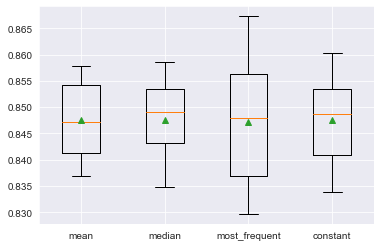

>mean 0.844 (0.008)
>median 0.845 (0.006)
>most_frequent 0.845 (0.008)
>constant 0.844 (0.009)


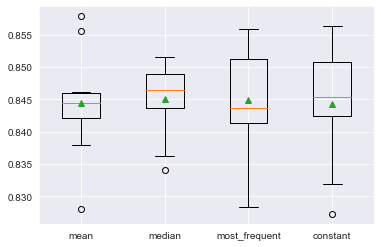

>mean 0.838 (0.005)
>median 0.839 (0.007)
>most_frequent 0.838 (0.006)
>constant 0.839 (0.008)


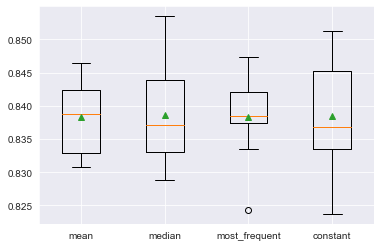

>mean 0.835 (0.007)
>median 0.835 (0.007)
>most_frequent 0.835 (0.008)
>constant 0.835 (0.007)


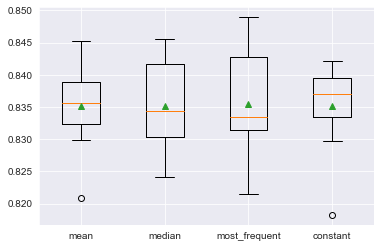

>mean 0.832 (0.006)
>median 0.832 (0.010)
>most_frequent 0.832 (0.006)
>constant 0.832 (0.008)


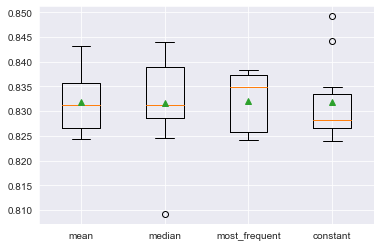

>mean 0.830 (0.005)
>median 0.830 (0.006)
>most_frequent 0.830 (0.009)
>constant 0.830 (0.004)


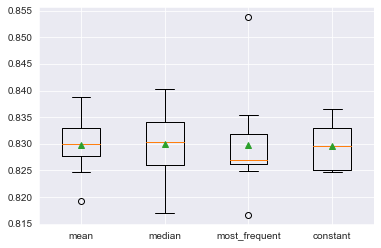

In [77]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

NN = [10,12,15,20,30,50,60,75,85]
for n in NN:
    Neigh = KNeighborsRegressor(n_neighbors=n)
    Results = list()
    Strategies = ['mean', 'median', 'most_frequent', 'constant']
    for s in Strategies:
        PipeLine = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', Neigh)])
        CV = KFold(n_splits=10, shuffle = True)
        Scores = cross_val_score(PipeLine, Train, y, scoring='r2', cv=CV, n_jobs=-1)
        Results.append(Scores)
        print('>%s %.3f (%.3f)' % (s, np.mean(Scores), np.std(Scores)))
    plt.boxplot(Results, labels=Strategies, showmeans=True)
    plt.show()

## DECISION TREE REGRESSOR:

>mean 0.816 (0.013)
>median 0.815 (0.009)
>most_frequent 0.817 (0.013)
>constant 0.816 (0.009)


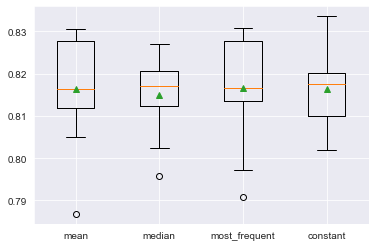

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

DTR = DecisionTreeRegressor(random_state=0)
Results = []
Strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in Strategies:
    PipeLine = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', DTR)])
    CV = KFold(n_splits=10, shuffle = True)
    Scores = cross_val_score(PipeLine, Train, y, scoring='r2', cv=CV, n_jobs=-1)
    Results.append(Scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(Scores), np.std(Scores)))
plt.boxplot(Results, labels=Strategies, showmeans=True)
plt.show()

In [79]:
dump(DTR,'DTR.joblib') 

['DTR.joblib']

In [80]:
Train.head()

Designation  Resource Allocation  STD_Mental  Gender_Female  Gender_Male  \
0          2.0                  3.0   -1.054092              1            0   
1          1.0                  2.0   -0.398082              0            1   
2          2.0                  5.0    0.039258              1            0   
3          1.0                  1.0   -1.710102              0            1   
4          3.0                  7.0    0.640600              1            0   

   Company Type_Product  Company Type_Service  WFH Setup Available_No  \
0                     0                     1                       1   
1                     0                     1                       0   
2                     1                     0                       0   
3                     0                     1                       0   
4                     0                     1                       1   

   WFH Setup Available_Yes  
0                        0  
1                        1  
2                        1  
3                        1  
4                        0

## MODEL PREDICTION

In [81]:
from joblib import dump, load
def Predict(Test):
    IDs = Test["Employee ID"].values
    Test.drop(["Employee ID","Date of Joining"],axis = "columns",inplace = True)
    Model = load('GBDT.joblib')
    STD = load('Standard.joblib')

    Test = pd.get_dummies(data = Test,columns = ["Gender","Company Type","WFH Setup Available"])
    
    Mental_Test = STD.transform(Test["Mental Fatigue Score"].values.reshape(-1,1))
    Test["STD_Mental"] = Mental_Test
    Test.drop("Mental Fatigue Score",axis="columns",inplace = True)
    Prediction = Model.predict(Test)
    Data = pd.DataFrame(list(zip(IDs,Prediction)),columns=["Employee ID","Burn Rate"])
    Data.to_csv("Model.csv",index = False)
    return Prediction,Data

In [82]:
Data = pd.read_csv("test.csv")
Prediction,Data = Predict(Data)

In [83]:
Data

Employee ID  Burn Rate
0      fffe31003300390039003000   0.595630
1      fffe31003300310037003800   0.548651
2      fffe33003400380035003900   0.374326
3          fffe3100370039003200   0.610608
4      fffe32003600390036003700   0.600782
...                         ...        ...
12245      fffe3900310034003700   0.551698
12246  fffe32003600330034003000   0.597420
12247  fffe31003800340039003000   0.632901
12248  fffe32003600380031003800   0.521686
12249  fffe32003100390037003800   0.559684

[12250 rows x 2 columns]